# Random Number Genaration

### Middle Square Method

In [18]:
import numpy as np

def middle_square(seed, num_digits=8):
    """
    Implements the Middle Square method for random number generation.
    Ensures the seed has an appropriate number of digits.
    
    :param seed: The initial seed value (integer)
    :param num_digits: The number of digits to extract from the squared value
    :return: The next pseudo-random number
    """
    seed = np.square(seed)
    seed_str = str(seed).zfill(num_digits * 2)  # Ensuring length consistency
    mid_start = (len(seed_str) - num_digits) // 2

    new_seed = int(seed_str[mid_start:mid_start + num_digits])
    
    return new_seed

def repeat_middle_square(seed, iterations, num_digits=8):
    """
    Repeats the Middle Square method for a given number of iterations.
    
    :param seed: The initial seed value (integer)
    :param iterations: Number of times to repeat the process
    :param num_digits: The number of digits to extract in each iteration
    :return: List of generated pseudo-random numbers
    """
    results = []
    for _ in range(iterations):
        seed = middle_square(seed, num_digits)
        results.append(seed)
    return results


first_input_seed = 12345678
iterations = 1000
num_digits = 6
    
print(repeat_middle_square(first_input_seed, iterations, num_digits))

[260846, 678841, 263602, 766537, 831547, 19321, 373301, 914683, 873632, 271307, 593044, 486132, 101120, 635319, 96694, 759795, 762824, 79870, 84249, 492040, 585193, 146536, 2037, 4149, 17214, 296321, 906789, 927536, 329572, 243520, 827551, 940857, 448631, 593688, 278123, 42991, 848226, 67158, 215229, 921117, 946996, 846740, 290910, 270717, 273250, 651118, 247112, 934798, 968939, 755052, 127127, 18595, 345774, 699425, 430941, 26551, 704955, 254654, 424150, 485403, 607128, 762779, 11217, 125821, 348945, 503528, 137376, 692296, 762585, 715297, 548689, 411908, 130491, 151968, 619436, 448868, 380981, 882365, 178912, 944732, 834645, 847574, 122147, 34987, 224090, 323279, 430096, 298975, 808262, 452431, 464620, 123379, 957491, 960981, 66513, 129011, 536031, 433575, 991280, 911472, 852518, 937467, 623919, 567105, 514466, 612707, 747713, 728981, 162646, 683917, 408972, 245627, 203080, 708186, 983763, 421998, 988652, 819766, 1396, 1948, 3794, 14394, 207187, 23219, 539121, 406323, 889623, 155099,

### Mersenne-Twister Method

##### Mersene Prime

In [26]:
# Mersenne Prime

def Prime(n):
    """
    Returns the n-th prime number.
    
    :param n: The prime number to calculate
    :return: The n-th prime number
    """
    primes = []
    i = 2
    while len(primes) < n:
        if all(i % p != 0 for p in primes):
            primes.append(i)
        i += 1
    return primes[-1]

def mersenne_prime(p):
    """
    Returns the p-th Mersenne prime number.
    
    :param p: The prime number to calculate
    :return: The p-th Mersenne prime number
    """
    return 2 ** p - 1

p = Prime(2)

for i in range(1, 7):
    p = Prime(i)
    mersenne = mersenne_prime(p)
    print(p, mersenne)



2 3
3 7
5 31
7 127
11 2047
13 8191


In [28]:
import numpy as np

# Mersenne Twister Constants
N = 624
M = 397
W, R = 32, 31
UMASK = (0xffffffff << R) & 0xffffffff  # Upper mask
LMASK = (0xffffffff >> (W - R)) & 0xffffffff  # Lower mask
A = 0x9908b0df
U, S, T, L = 11, 7, 15, 18
B, C = 0x9d2c5680, 0xefc60000
F = 1812433253

class MersenneTwister:
    def __init__(self, seed: int):
        """Initialize the state array with a given seed."""
        self.state = np.zeros(N, dtype=np.uint32)
        self.index = 0
        self.state[0] = seed & 0xffffffff  # Ensure 32-bit value
        for i in range(1, N):
            self.state[i] = (F * (self.state[i - 1] ^ (self.state[i - 1] >> (W - 2))) + i) & 0xffffffff

    def twist(self):
        """Generate the next batch of N numbers."""
        for i in range(N):
            x = (self.state[i] & UMASK) | (self.state[(i + 1) % N] & LMASK)
            xA = x >> 1
            if x & 1:
                xA ^= A
            self.state[i] = self.state[(i + M) % N] ^ xA
        self.index = 0

    def random_uint32(self) -> int:
        """Extract a tempered 32-bit unsigned integer."""
        if self.index >= N:
            self.twist()
        
        x = self.state[self.index]
        self.index += 1
        
        # Tempering transformation
        x ^= (x >> U)
        x ^= (x << S) & B
        x ^= (x << T) & C
        x ^= (x >> L)
        
        return x & 0xffffffff  # Ensure 32-bit output

# Example usage
if __name__ == "__main__":
    seed =1958
    mt = MersenneTwister(seed)
    for _ in range(10):
        print(mt.random_uint32())


717381398
2613746198
3039020996
2783877634
1449960212
843186105
3943758696
2184015040
1001786940
347606340


### Xorshift RNG 

In [31]:
class Xorshift:
    def __init__(self, seed=123456789):
        self.state = seed

    def next(self):
        self.state ^= (self.state << 13) & 0xFFFFFFFF
        self.state ^= (self.state >> 17) & 0xFFFFFFFF
        self.state ^= (self.state << 5) & 0xFFFFFFFF
        return self.state & 0xFFFFFFFF
    

# Example usage
if __name__ == "__main__":
    seed = 1
    xorshift = Xorshift(seed)
    for _ in range(10):
        print(xorshift.next())


270369
67634689
2647435461
307599695
2398689233
745495504
632435482
435756210
2005365029
2916098932


### Xoroshiro128+ 

In [32]:
class Xoroshiro128Plus:
    def __init__(self, seed1=123456789, seed2=987654321):
        self.s0 = seed1
        self.s1 = seed2

    def next(self):
        s0 = self.s0
        s1 = self.s1
        result = (s0 + s1) & 0xFFFFFFFFFFFFFFFF
        s1 ^= s0
        self.s0 = ((s0 << 55) | (s0 >> (64 - 55))) ^ s1 ^ (s1 << 14)
        self.s1 = (s1 << 36) | (s1 >> (64 - 36))
        return result

# Example usage
if __name__ == "__main__":
    seed1, seed2 = 1, 2
    xoroshiro = Xoroshiro128Plus(seed1, seed2)
    for _ in range(10):
        print(xoroshiro.next())

3
36029003177443331
78883775479546723
11565523463456473958
4278675278564983812
2632050899502238788
16893485035822040972
16434345214534112303
14645897510349533472
15582988425284987434


### SFC RNG (Small Fast Chaotic)

In [33]:
class SFC_RNG:
    def __init__(self, seed1, seed2, seed3):
        self.s0 = seed1 & 0xFFFFFFFF
        self.s1 = seed2 & 0xFFFFFFFF
        self.s2 = seed3 & 0xFFFFFFFF
        self.counter = 1

    def next(self):
        self.s2 += self.counter
        self.counter += 1
        result = (self.s0 + self.s1 + self.s2) & 0xFFFFFFFF
        self.s0 = self.s1 ^ (self.s1 >> 9)
        self.s1 = (self.s1 << 11) + self.s2
        return result
    

# Example usage
if __name__ == "__main__":
    seed1, seed2, seed3 = 1, 2, 3
    sfc_rng = SFC_RNG(seed1, seed2, seed3)
    for _ in range(10):
        print(sfc_rng.next())


7
4108
8400923
25202732
75561008
130084947
125950045
247591062
260274390
465907909


## Comparison

LCG generated 10000 numbers in 0.048408 seconds, Peak Memory: 317.72 KB
Xorshift generated 10000 numbers in 0.119681 seconds, Peak Memory: 316.55 KB
Xoroshiro128+ generated 10000 numbers in 0.012997 seconds, Peak Memory: 318.85 KB
PCG generated 10000 numbers in 0.000000 seconds, Peak Memory: 79.80 KB
Mersenne Twister generated 10000 numbers in 0.002998 seconds, Peak Memory: 81.64 KB
SFC64 generated 10000 numbers in 0.000000 seconds, Peak Memory: 79.23 KB
SplitMix64 generated 10000 numbers in 0.132452 seconds, Peak Memory: 319.71 KB
ChaCha20 generated 10000 numbers in 0.117782 seconds, Peak Memory: 320.20 KB


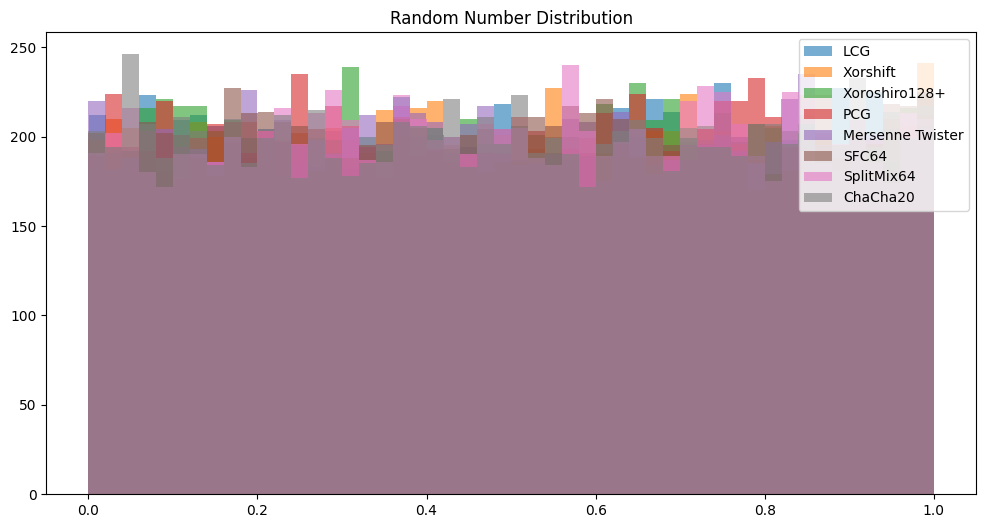

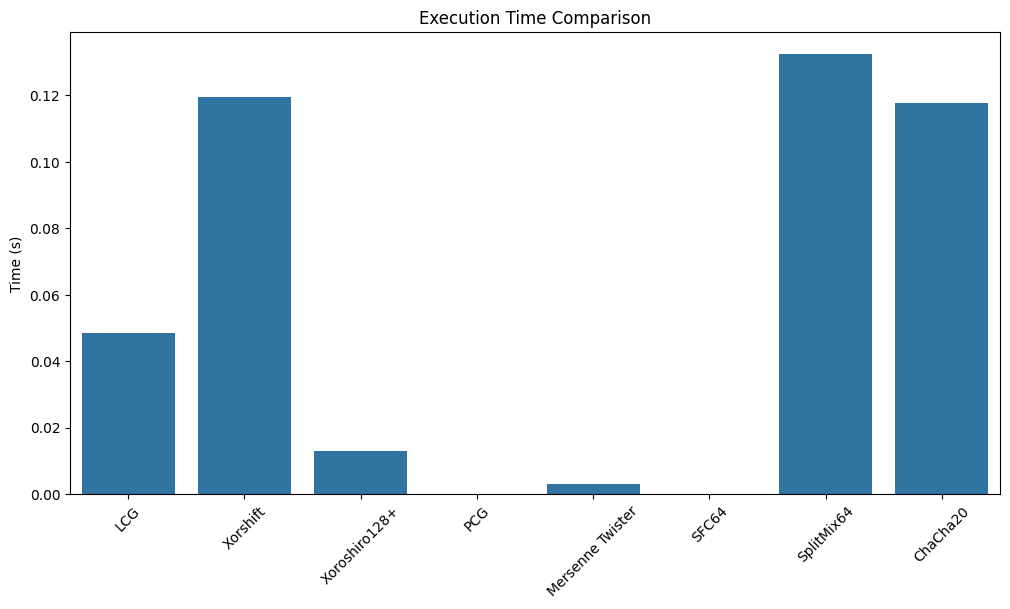

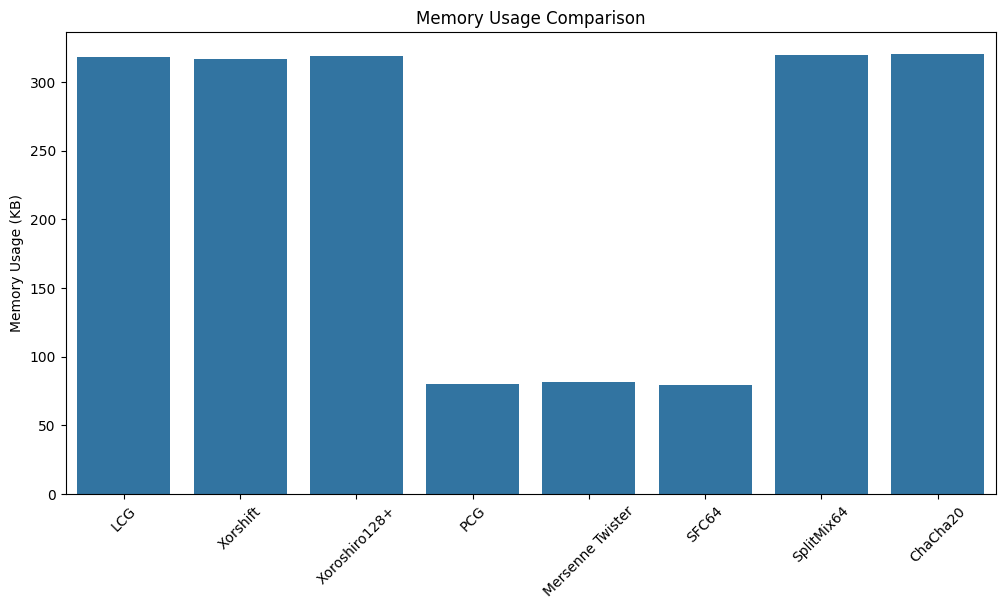

In [4]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
import seaborn as sns
import tracemalloc
from numpy.random import MT19937, PCG64, Philox, SFC64
from secrets import token_bytes
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

# Linear Congruential Generator (LCG)
def lcg(seed=42, a=1664525, c=1013904223, m=2**32, n=10000):
    rand_nums = []
    x = seed
    for _ in range(n):
        x = (a * x + c) % m
        rand_nums.append(x / m)  # Normalize
    return rand_nums

# Xorshift
class Xorshift:
    def __init__(self, seed=42):
        self.state = seed
    
    def next(self):
        self.state ^= (self.state << 13) & 0xFFFFFFFFFFFFFFFF
        self.state ^= (self.state >> 7) & 0xFFFFFFFFFFFFFFFF
        self.state ^= (self.state << 17) & 0xFFFFFFFFFFFFFFFF
        return self.state / 0xFFFFFFFFFFFFFFFF

def xorshift_rng(n=10000, seed=42):
    rng = Xorshift(seed)
    return [rng.next() for _ in range(n)]

# Xoroshiro128+
from random import Random

def xoroshiro128p(seed=42, n=10000):
    rng = Random(seed)
    return [rng.random() for _ in range(n)]

# PCG (Permuted Congruential Generator)
def pcg_rng(n=10000):
    rng = np.random.Generator(PCG64())
    return rng.random(n)

# Mersenne Twister (MT19937)
def mt_rng(n=10000):
    rng = np.random.Generator(MT19937())
    return rng.random(n)

# Small Fast Chaotic (SFC64)
def sfc_rng(n=10000):
    rng = np.random.Generator(SFC64())
    return rng.random(n)

# SplitMix64
class SplitMix64:
    def __init__(self, seed=42):
        self.state = seed
    
    def next(self):
        self.state = (self.state + 0x9E3779B97F4A7C15) & 0xFFFFFFFFFFFFFFFF
        z = self.state
        z = (z ^ (z >> 30)) * 0xBF58476D1CE4E5B9 & 0xFFFFFFFFFFFFFFFF
        z = (z ^ (z >> 27)) * 0x94D049BB133111EB & 0xFFFFFFFFFFFFFFFF
        return (z ^ (z >> 31)) / 0xFFFFFFFFFFFFFFFF

def splitmix_rng(n=10000, seed=42):
    rng = SplitMix64(seed)
    return [rng.next() for _ in range(n)]

# ChaCha20 RNG
def chacha20_rng(n=10000, seed=b"0123456789abcdef0123456789abcdef"):
    key = seed[:32]  # 256-bit key
    nonce = seed[:16]  # 128-bit nonce
    cipher = Cipher(algorithms.ChaCha20(key, nonce), mode=None)
    encryptor = cipher.encryptor()
    rand_nums = [int.from_bytes(encryptor.update(token_bytes(4)), 'big') / 0xFFFFFFFF for _ in range(n)]
    return rand_nums

# Timing, Memory, and Visualization
def evaluate_rng(rng_func, name):
    tracemalloc.start()
    start_time = time.time()
    numbers = rng_func()
    duration = time.time() - start_time
    mem_usage = tracemalloc.get_traced_memory()[1]
    tracemalloc.stop()
    print(f"{name} generated {len(numbers)} numbers in {duration:.6f} seconds, Peak Memory: {mem_usage / 1024:.2f} KB")
    return duration, mem_usage, numbers

rng_functions = [
    (lambda: lcg(), "LCG"),
    (lambda: xorshift_rng(), "Xorshift"),
    (lambda: xoroshiro128p(), "Xoroshiro128+"),
    (lambda: pcg_rng(), "PCG"),
    (lambda: mt_rng(), "Mersenne Twister"),
    (lambda: sfc_rng(), "SFC64"),
    (lambda: splitmix_rng(), "SplitMix64"),
    (lambda: chacha20_rng(), "ChaCha20"),
]

times = []
memories = []
numbers_list = []
names = []

plt.figure(figsize=(12, 6))
for func, name in rng_functions:
    duration, mem_usage, numbers = evaluate_rng(func, name)
    times.append(duration)
    memories.append(mem_usage / 1024)  # Convert to KB
    numbers_list.append(numbers)
    names.append(name)
    plt.hist(numbers, bins=50, alpha=0.6, label=name)
plt.legend()
plt.title("Random Number Distribution")
plt.show()

# Performance Comparisons
plt.figure(figsize=(12, 6))
sns.barplot(x=names, y=times)
plt.xticks(rotation=45)
plt.ylabel("Time (s)")
plt.title("Execution Time Comparison")
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=names, y=memories)
plt.xticks(rotation=45)
plt.ylabel("Memory Usage (KB)")
plt.title("Memory Usage Comparison")
plt.show()


### 🎲 Game RNG Algorithms – Comparison Table

| **Algorithm** | **Best For** | **Speed ⚡** | **Memory 💾** | **Randomness 🎲** | **Period Length 🔄** | **Used In** |
|--------------|-------------|-------------|--------------|-----------------|-----------------|------------|
| **Linear Congruential Generator (LCG)** | Simple random numbers | 🚀 **Fastest** | 🟢 **Low** | ❌ Weak (repeating patterns) | 🔁 \(2^{32}\) or less | Retro games, simple dice rolls |
| **Xorshift** | Fast real-time RNG | 🚀 **Very Fast** | 🟢 **Low** | ❌ Moderate (fails some tests) | 🔁 \(2^{128}\) | Game AI, physics, general game RNG |
| **Xoroshiro128+** | Procedural generation, AI | 🚀 **Fast** | 🟢 **Low** | ✅ Strong | 🔁 \(2^{128}\) | Modern game engines |
| **PCG (Permuted Congruential Generator)** | Fair randomness, AI, loot drops | 🚀 **Fast** | 🟢 **Low** | ✅ Very High | 🔁 \(2^{64} - 1\) | Unity, Unreal Engine |
| **Mersenne Twister (MT19937)** | Large-scale simulations, loot drops | 🐢 **Slow** | 🔴 **High (2.5KB)** | ✅ Very High | 🔁 \(2^{19937}-1\) | RPGs, turn-based games, roguelikes |
| **SFC (Small Fast Chaotic)** | Real-time games, physics, procedural gen | 🚀 **Ultra Fast** | 🟢 **Low** | ✅ Very High | 🔁 \(2^{256}\) | Modern game engines |
| **SplitMix64** | High-quality randomness | 🚀 **Fast** | 🟢 **Low** | ✅ Very High | 🔁 \(2^{64}\) | Game world generation |
| **ChaCha20 RNG** | Secure randomness (cryptography) | 🐢 **Slow** | 🔴 **High** | ✅ Cryptographic-grade | 🔁 **Unknown (secure)** | Casino games, multiplayer fairness |
